# Student performance Prediction

## Data Load and Selected Columns 
#### In this step, We load the data and selected 10 most relevant columns for our analyis 


In [ ]:
import pandas as pd 
#we have take one class like datacollector and pass the file name in construtor ,so that we can load data and understand#
class datacollector :
    def __init__(self,file_name):
        self.file_name=file_name
        self.data=None
#i have take method data load in which self parameter pass which is for object refrence#
    def data_load(self):
# we use "sep"for removing ";" and take the file_name for understanding data#
        self.data=pd.read_csv(self.file_name,sep=";")  
        
# we have print data load sucessfully when we give the file in an object#
        print(f"data load sucessfully from {self.file_name}")  
# return method give the file information# 
        return self.data
# we have check shape or coilumns_name# 
    def checking(self):
# shape : give the number of rows and columns# 
        print(f" shape {self.data.shape}")
# columns : give the columns name# 
        print(f"columns_name {self.data.columns}")
# now we have take columns which we want like we want only numeric columns so we take 10 columns which is numeric data# 
    def selected_columns(self,columns_to_keep):
        self.data=self.data[columns_to_keep]
# return : return you the most numeric columns which we have selected# 
        return self.data
# in summary method : we have to see the columns name again#   
    def get_summary(self):
# description: in which give the mean mode std values of every numeric data# 
# info: in which we have to see ,is columns obj or integer# 
# head : give the first five rows#
        print(f"\ncolumns_name\n {self.data.columns},\ndescription :\n {self.data.describe()},\ninformation:\n {self.data.info()},\nfive first columns :\n {self.data.head()}")
    
# we have select here the ten columns#       
selected_columns=["G1","G2","G3","Medu","Fedu","studytime","goout","health","absences","failures"]   
#object : it is the reference of every class method ,here is "o" our object ,we have pass the file# 
o=datacollector("student-mat.csv")
#data_load: we check is our data load or not# 
o.data_load()
#check what is the data around# 
o.checking()
# change the columns and select only ten numeric columns# 
o.selected_columns(selected_columns)
# have to see the summary of the hole data# 
o.get_summary()


data load sucessfully from student-mat.csv
 shape (395, 33)
columns_name Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   Medu       395 non-null    int64
 4   Fedu       395 non-null    int64
 5   studytime  395 non-null    int64
 6   goout      395 non-null    int64
 7   health     395 non-null    int64
 8   absences   395 non-null    int64
 9   failures   395

## Data Understanding

In [ ]:
class DataUnderstanding:
    def __init__(self, data):
# Initialize with a pandas DataFrame#
        self.data = data

    def overview(self):
#we have Display the basic info and stats about the dataset#
        print("Shape of the data:", self.data.shape)
#dtypes : te;ll us about the data ,like integer or object,float#
        print("\nData types:\n", self.data.dtypes)
#isnull.sum: when we use this ,if in our data null values place then we have met sum of null values#
        print("\nMissing values:\n", self.data.isnull().sum())
#describe:we have already seen#
        print("\nStatistical summary:\n", self.data.describe(include='all'))
#unique: we can find unique values in any column#
    def unique_values(self, column):
#Print unique values in a column#
        unique_vals = self.data[column].unique()
        print(f"Unique values in '{column}':\n{unique_vals}")
#understanding is our object#  
understanding = DataUnderstanding(data)

understanding.overview()
#we have to find unique values of G1#
understanding.unique_values('G1')


Shape of the data: (395, 10)

Data types:
 G1             int64
G2           float64
G3           float64
Medu           int64
Fedu           int64
studytime    float64
goout          int64
health         int64
absences       int64
failures       int64
dtype: object

Missing values:
 G1           0
G2           0
G3           0
Medu         0
Fedu         0
studytime    0
goout        0
health       0
absences     0
failures     0
dtype: int64

Statistical summary:
                G1          G2          G3        Medu        Fedu   studytime  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    10.908861    0.563891    0.520759    2.749367    2.521519    0.345148   
std      3.319195    0.197974    0.229072    1.094735    1.088201    0.279747   
min      3.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      8.000000    0.473684    0.400000    2.000000    2.000000    0.000000   
50%     11.000000    0.578947    0.550000  

## DATA Preprocessing
### In data processing we check the values if null,then drop or fill the columns if null values met.

In [57]:
class DataPreprocessing:
    def __init__(self, data):
# Initialize with a pandas DataFrame
        self.data = data
    def fill_missing_with_mean(self, columns):
# Fill missing values in specified columns with mean
        for col in columns:
            mean_val = self.data[col].mean()
#we have use the fillna method which fill the values in any column or data 
            self.data[col] = self.data[col].fillna(mean_val)
        
    def normalize_columns(self, columns):
# Normalize specified numeric columns (Min-Max scaling)
        for col in columns:
             min_val = self.data[col].min()
             max_val = self.data[col].max()
             self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

preprocessor = DataPreprocessing(data)
# Fill missing numeric values
preprocessor.fill_missing_with_mean(['G1', 'G2'])
# Normalize numeric columns
preprocessor.normalize_columns(['studytime', 'G2', 'G3'])
# Final clean data
processed_data = preprocessor.data
print(processed_data.head())




   G1        G2    G3  Medu  Fedu  studytime  goout  health  absences  \
0   5  0.315789  0.30     4     4   0.333333      4       3         6   
1   5  0.263158  0.30     1     1   0.333333      3       3         4   
2   7  0.421053  0.50     1     1   0.333333      2       3        10   
3  15  0.736842  0.75     4     2   0.666667      2       5         2   
4   6  0.526316  0.50     3     3   0.333333      2       5         4   

   failures  
0         0  
1         0  
2         3  
3         0  
4         0  


## univariate analysis

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64


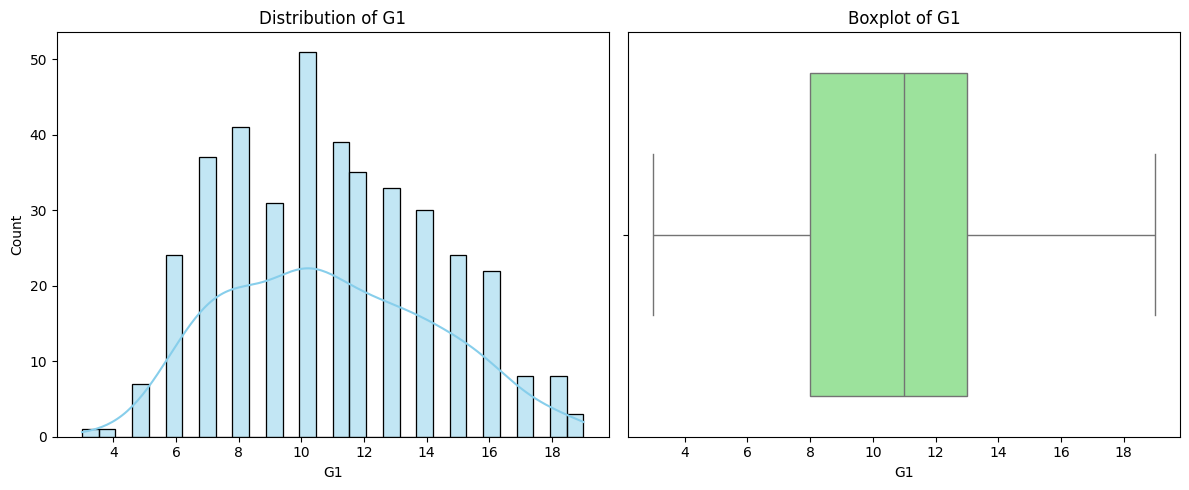

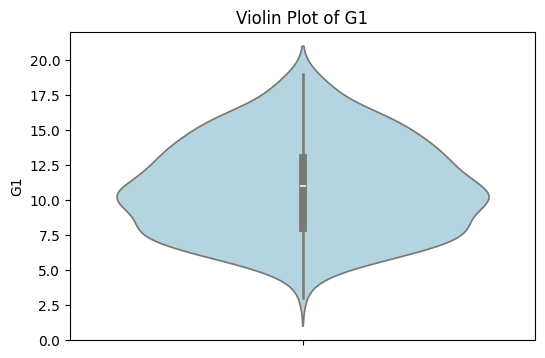

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class UnivariateAnalysis:
    def __init__(self, data):
# Initialize with a pandas DataFrame
        self.data = data

    def describe_column(self, column):
# Print basic statistics of a column
        print(self.data[column].describe())

    def plot_numeric(self, column):
# Plot histogram and boxplot for numeric column
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(self.data[column], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='lightgreen')
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()
    def plot_violin(self, column):
       plt.figure(figsize=(6, 4))
       sns.violinplot(y=self.data[column], color='lightblue')
       plt.title(f'Violin Plot of {column}')
       plt.show()

   
        
uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('G1')
uni.plot_numeric('G1')
uni.plot_violin('G1')




count    395.000000
mean       0.563891
std        0.197974
min        0.000000
25%        0.473684
50%        0.578947
75%        0.684211
max        1.000000
Name: G2, dtype: float64


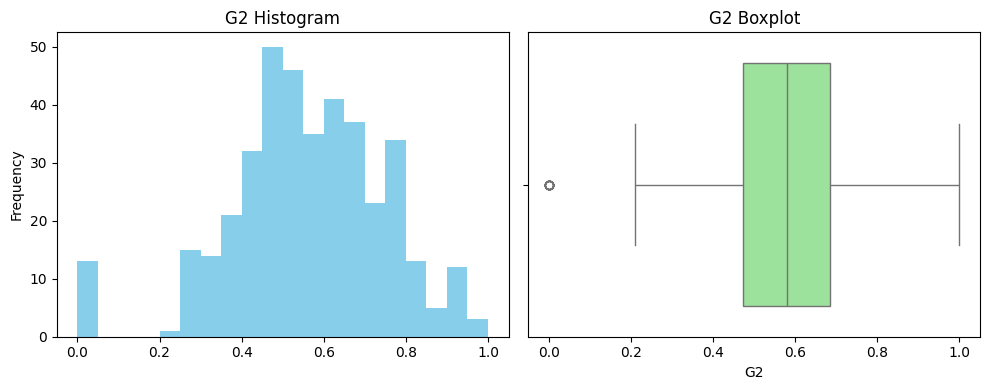

In [59]:
class UnivariateAnalysis:
    def __init__(self, data):
        self.data = data

    def describe_column(self, column):
        print(self.data[column].describe())

    def plot_numeric(self, column):
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        self.data[column].plot(kind='hist', bins=20, color='skyblue')
        plt.title(f'{column} Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='lightgreen')
        plt.title(f'{column} Boxplot')
        plt.tight_layout()
        plt.show()

uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('G2')
uni.plot_numeric('G2')




## bivariate analysis

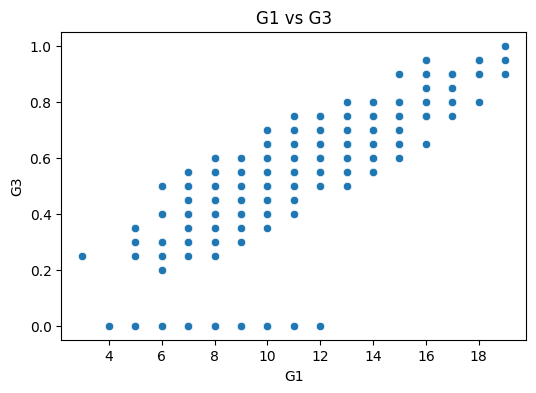

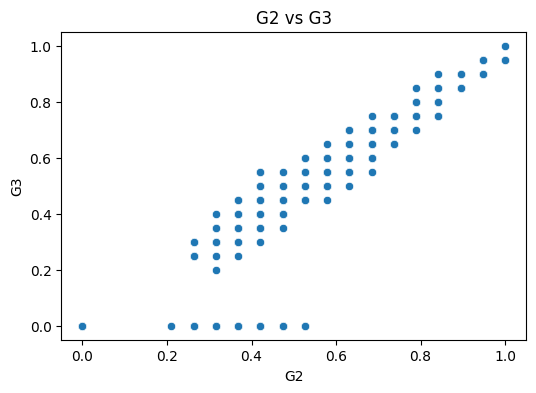

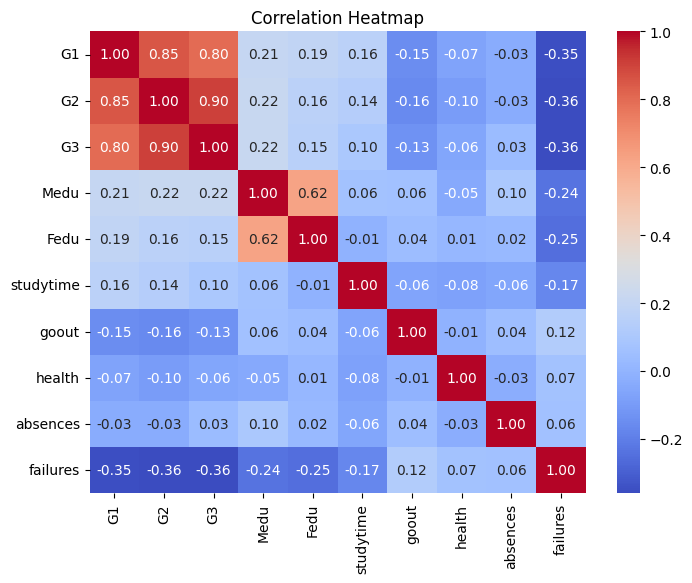

In [60]:


class BivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def scatter_plot(self, x, y):
        # Scatter plot for numeric vs numeric
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=self.data[x], y=self.data[y])
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    

    def correlation_heatmap(self):
        # Correlation heatmap for numeric columns
        plt.figure(figsize=(8, 6))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
        
biv = BivariateAnalysis(data)

# Numeric vs numeric
biv.scatter_plot('G1', 'G3')
biv.scatter_plot('G2', 'G3')


# Correlation heatmap
biv.correlation_heatmap()


## data spilting

In [62]:
from sklearn.model_selection import train_test_split

class DataSplitter:
    def __init__(self, data, target_column):
        # Store the full dataset and target column
        self.data = data
        self.target_column = target_column

    def split(self, test_size=0.2, random_state=42):
        # Split the data into features (X) and target (y)
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        # Perform train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Store and return splits
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        return X_train, X_test, y_train, y_test
splitter = DataSplitter(processed_data, target_column='G1')
X_train, X_test, y_train, y_test = splitter.split(test_size=0.2)
print(X_train,y_train,X_test,y_test)

           G2    G3  Medu  Fedu  studytime  goout  health  absences  failures
181  0.684211  0.60     3     3   0.333333      3       3         2         0
194  0.736842  0.70     2     3   0.000000      3       3         0         0
173  0.368421  0.00     1     3   0.333333      5       3         0         3
63   0.473684  0.45     4     3   0.666667      4       4         2         0
253  0.473684  0.40     2     1   0.000000      2       3         0         0
..        ...   ...   ...   ...        ...    ...     ...       ...       ...
71   0.526316  0.50     4     2   1.000000      3       3         0         0
106  0.421053  0.40     2     2   1.000000      2       3         8         0
270  0.473684  0.45     3     3   0.333333      5       5        15         2
348  0.789474  0.75     4     3   0.666667      3       4         0         0
102  0.684211  0.70     4     4   0.000000      3       5         4         0

[316 rows x 9 columns] 181    12
194    13
173     8
63     10


## data training

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ---- Your ModelTrainer class ----
class ModelTrainer:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.model = None

    def train_svm(self, kernel='rbf', C=1.0, epsilon=0.1):
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)
        self.model.fit(self.X_train, self.y_train)
        print("SVM model trained successfully.")
        return self.model

    def evaluate(self, X_test, y_test):
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R² Score: {r2:.2f}")

# ---- Sample Data Loading ----
# Replace with your actual cleaned dataframe
df = pd.read_csv("student-mat.csv", sep=";")
selected_columns = ["G1", "G2", "Medu", "Fedu", "studytime", "goout", "health", "absences", "failures", "G3"]
df = df[selected_columns]

# Split into features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Create object and train
trainer = ModelTrainer(X_train, y_train)
trainer.train_svm(kernel='rbf', C=1.0, epsilon=0.2)
trainer.evaluate(X_test, y_test)
trainer = ModelTrainer(X_train, y_train)
trainer.train_svm()
trainer.evaluate(X_test, y_test)

SVM model trained successfully.
Mean Squared Error: 4.08
R² Score: 0.80
SVM model trained successfully.
Mean Squared Error: 4.07
R² Score: 0.80


## model storage using pickle

In [64]:
# Assuming the model is already trained with trainer.train_svm()

from sklearn.svm import SVR
import pickle

# Your class again (already correct)
class ModelStorage:
    def __init__(self, model):
        self.model = model

    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("Model saved to", filename)

    def load_model(self, filename):
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        print("Model loaded from", filename)
        return self.model

# ✅ Step-by-step usage:
trainer = ModelTrainer(X_train, y_train)
model = trainer.train_svm()

# Create ModelStorage object and save
storage = ModelStorage(model)
storage.save_model("student_model.pkl")

# Later: Load model again
new_storage = ModelStorage(None)
loaded_model = new_storage.load_model("student_model.pkl")

SVM model trained successfully.
Model saved to student_model.pkl
Model loaded from student_model.pkl


In [65]:
def value_counts(self):
        self.data=self.data["G2"].value_counts().plot(kind="bar")
        return self.data